In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv('/kaggle/input/tour-travels-customer-churn-prediction/Customertravel.csv')

In [48]:
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [50]:
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [51]:
len(data[data.duplicated()])

507

In [52]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [53]:
data.corr(numeric_only=True)['Target']

Age             -0.131534
ServicesOpted    0.038646
Target           1.000000
Name: Target, dtype: float64

<Axes: xlabel='Target', ylabel='Age'>

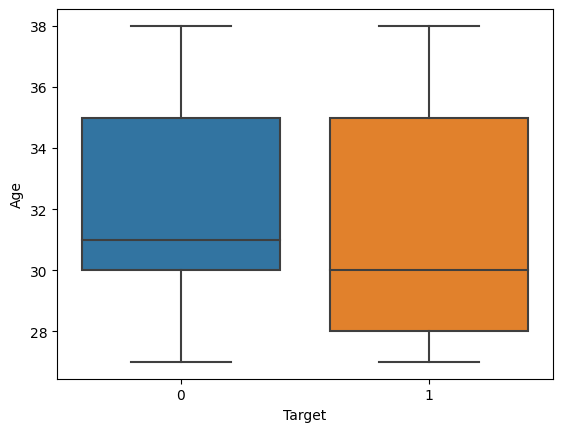

In [55]:
sns.boxplot(x='Target',y='Age',data=data)

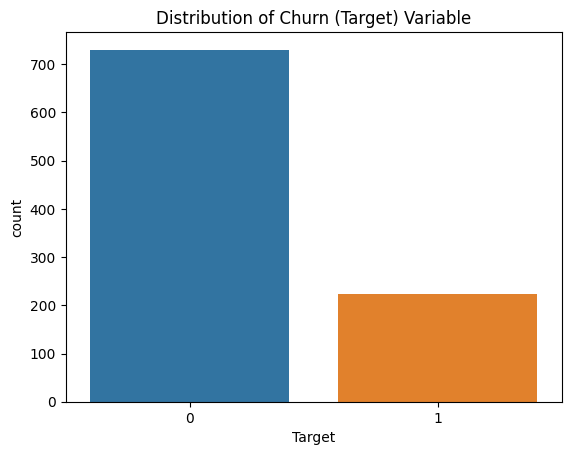

In [56]:
plt.title('Distribution of Churn (Target) Variable')
sns.countplot(data=data,x='Target')
plt.show()

In [57]:
for col in data.describe(include = 'object') .columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

FrequentFlyer
['No' 'Yes' 'No Record']
--------------------------------------------------
AnnualIncomeClass
['Middle Income' 'Low Income' 'High Income']
--------------------------------------------------
AccountSyncedToSocialMedia
['No' 'Yes']
--------------------------------------------------
BookedHotelOrNot
['Yes' 'No']
--------------------------------------------------


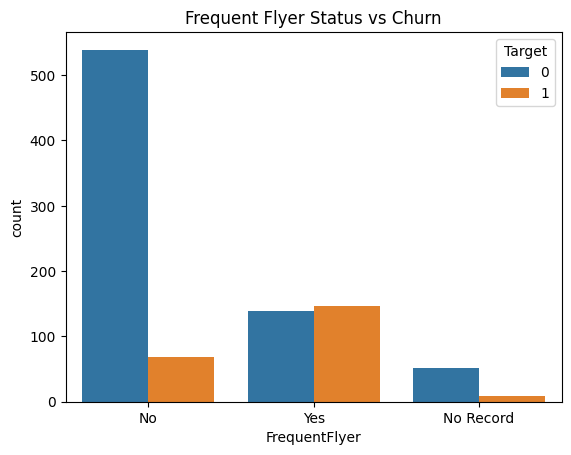

In [58]:
sns.countplot(x='FrequentFlyer', hue='Target', data=data)
plt.title('Frequent Flyer Status vs Churn')
plt.show()

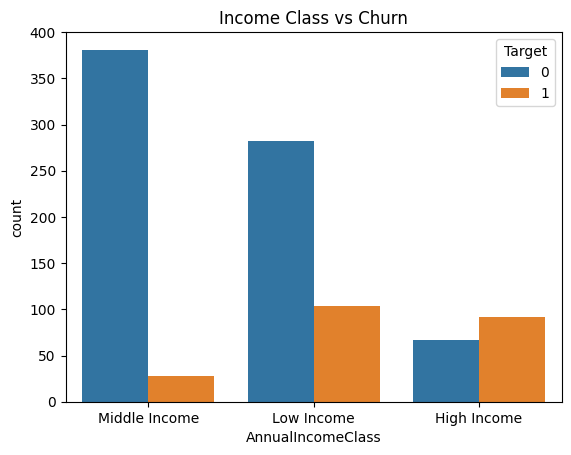

In [60]:
sns.countplot(x='AnnualIncomeClass', hue='Target', data=data)
plt.title('Income Class vs Churn')
plt.show()

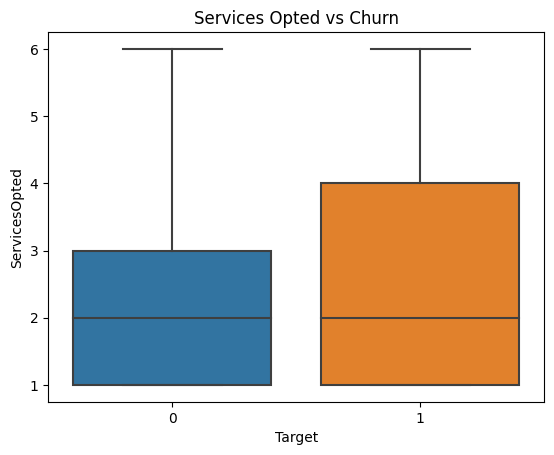

In [62]:
sns.boxplot(x='Target', y='ServicesOpted', data=data)
plt.title('Services Opted vs Churn')
plt.show()

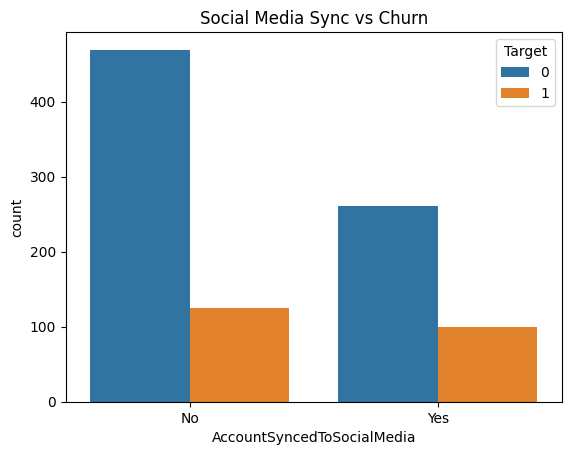

In [64]:
sns.countplot(x='AccountSyncedToSocialMedia', hue='Target', data=data)
plt.title('Social Media Sync vs Churn')
plt.show()

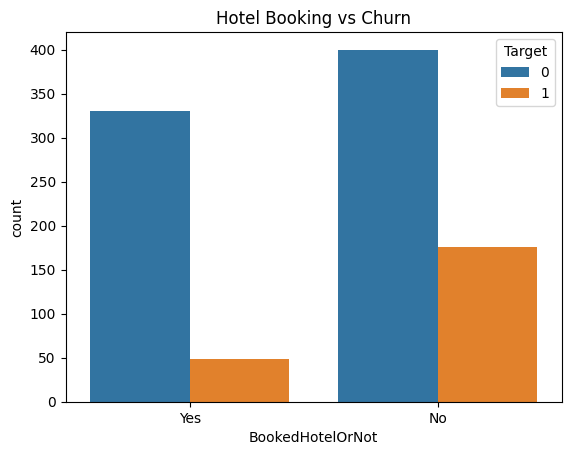

In [66]:
sns.countplot(x='BookedHotelOrNot', hue='Target', data=data)
plt.title('Hotel Booking vs Churn')
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
features = ['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']
for f in features:
    data[f] = number.fit_transform(data[f])
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [68]:
income = data.groupby("AnnualIncomeClass")
income = income.size()
income

AnnualIncomeClass
0    159
1    386
2    409
dtype: int64

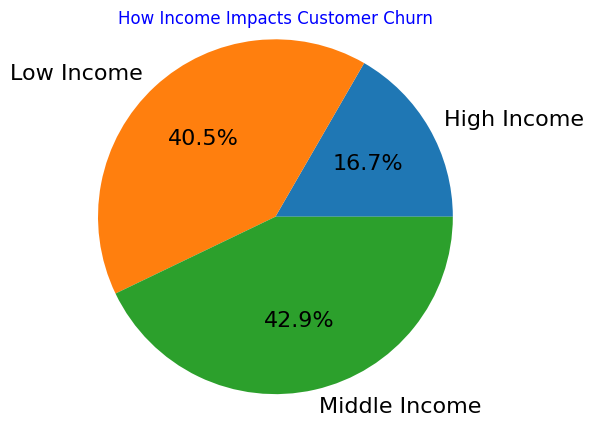

In [69]:
plt.pie(income.values , labels = ("High Income", "Low Income", "Middle Income" ), autopct='%1.1f%%', radius = 1.2, textprops = {"fontsize" : 16}) 
plt.title("How Income Impacts Customer Churn", c="b")
plt.show()

In [70]:
data.corr()['Target'].drop('Target').sort_values()

AnnualIncomeClass            -0.418092
BookedHotelOrNot             -0.206055
Age                          -0.131534
ServicesOpted                 0.038646
AccountSyncedToSocialMedia    0.073831
FrequentFlyer                 0.418672
Name: Target, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


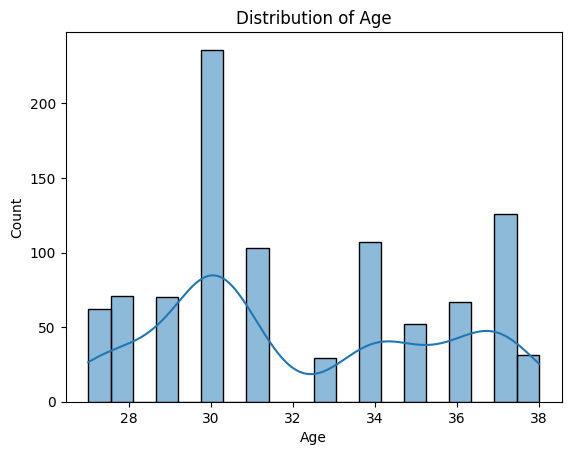

In [71]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

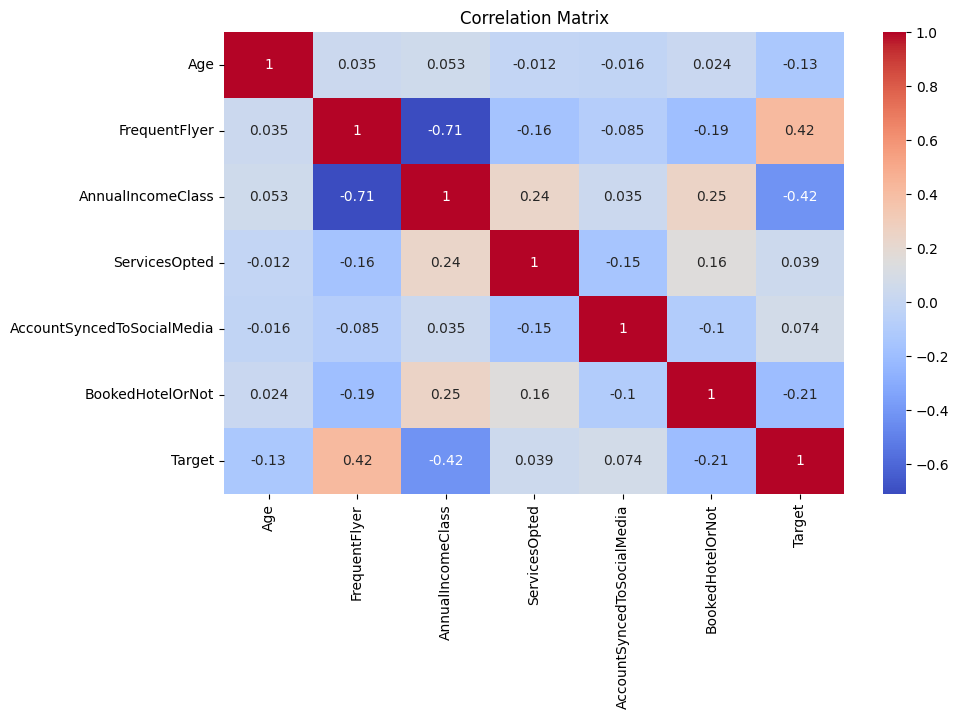

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()